In [1]:
import os

import sys
import glob
import re
import h5py
from netCDF4 import Dataset

import numpy as np

import datetime

import matplotlib.colors as colors
import matplotlib.pyplot as plt

# Need Ben Smith's pointCollection repository (https://github.com/SmithB/pointCollection), required by read_xovers.
sys.path.append('/home/dfelikso/Software/ICESat-2/pointCollection')
from read_xovers import read_xovers


# Read in mask from BedMachine for plotting

If there is a BedMachine netcdf file available, provide the path to it below. This will read in the BedMachine mask and will then plot it in the map plots for orientation.

In [2]:
bedmachine_ncfile = '/explore/nobackup/people/dfelikso/Data/GreenlandBed/MCbed/BedMachineGreenland-2017-09-20/BedMachineGreenland-2017-09-20.nc'
if os.path.isfile(bedmachine_ncfile):
    ds = Dataset(bedmachine_ncfile, 'r')
    x_mask = ds['x'][:]
    y_mask = ds['y'][:]
    mask = ds['mask'][:,:]
    extent_mask = np.array([x_mask[ 0] - (x_mask[1]-x_mask[0])/2, x_mask[-1] + (x_mask[1]-x_mask[0])/2, \
                            y_mask[-1] + (y_mask[1]-y_mask[0])/2, y_mask[ 0] - (y_mask[1]-y_mask[0])/2])
    ds.close()

    # BedMachine colormap
    cmap_mask = colors.ListedColormap(['#9bdfff', '#b27926', 'white', 'white', '#9bdfff'])
    boundaries_mask = [0, 1, 2, 3, 4]
    norm_mask = colors.BoundaryNorm(boundaries_mask, cmap_mask.N, clip=True)
else:
    mask = None
    

# Read in the crossovers

Crossovers are computed for each cycle within 100 km x 100 km tiles for parallel processing. The filenames give the center coordinate of each tile. For example, the file E-500000_N-1300000.h5 has crossovers within the tile centered at x = -500000 m, y = -1300000 m (EPSG 3413 for Greenland and EPSG 3412 for Antarctica).

Here's where we can specify which crossovers to read by using a wildcard to search for particular files, specifying min/max delta t, or specifying spatial bounds in polar sterographic coordinates. See read_xovers.py for more information on options for how to read in files.

The read_xovers function returns 4 variables:
1. **v**: dict of nx2 matrices, giving ATL06 parameters interpolated to the crossover locations.  The first column gives the value for the first measurement in the crossover, the second the value from the second.
1. **delta**: dict of nx1 matrices, giving ATL06 parameter differences between the crossover measurents, late minus early
1. **bar**: dict of nx1 matrices, giving ATL06 parameter averages between the crossover measurents
1. **meta**: metadata values at the crossovers


In [3]:
import re

xover_dir = '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15'

wildcard='E-[1,2]00000_N-{24}00000'
wildcard='E-*00000_N-*000000'

#v, delta, bar, meta = read_xovers(xover_dir, wildcard=wildcard, \
#                                  delta_t_min=0, delta_t_max=np.inf, verbose=True)

tiles=glob.glob(xover_dir+'/'+wildcard+'.h5')
print(len(tiles))
print(tiles)


13
['/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15/E-100000_N-2000000.h5', '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15/E-100000_N-3000000.h5', '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15/E-100000_N-1000000.h5', '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15/E-200000_N-1000000.h5', '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15/E-200000_N-2000000.h5', '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15/E-200000_N-3000000.h5', '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15/E-300000_N-2000000.h5', '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15/E-300000_N-1000000.h5', '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15/E-300000_N-3000000.h5', '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15/E-400000_N-2000000.h5', '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15/E-400000_N-1000000.h5', '/explore/nobackup/projects/icesat-2/ATL06_xo/Arct

In [4]:
import read_xovers
import importlib
importlib.reload(read_xovers)

# Specify the directory where crossovers are located
xover_dir = '/explore/nobackup/projects/icesat-2/ATL06_xo/Arctic/r005/c15'

# HINTS:
#  1.) Jakobshavn data is in tile E-200000_N-2300000
#  2.) Helheim data is in tile E300000_N-2600000

v, delta, bar, meta = read_xovers.read_xovers(xover_dir, \
                                  delta_t_min=0, delta_t_max=np.inf, verbose=True)
#v, delta, bar, meta = read_xovers.read_xovers(xover_dir, wildcard='E-200000_N-2300000', \
#                                  delta_t_min=0, delta_t_max=np.inf, verbose=True)

meta['slope_mag']=np.abs(meta['slope_x']+1j*meta['slope_y'])


Found 285 crossover tiles
Reading 285 crossover tiles
Tiles contain 349747 crossovers


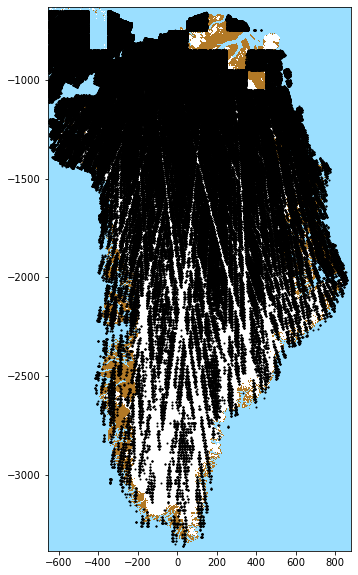

In [5]:
# Plot
fig, ax = plt.subplots(1,1,figsize=(20,10))
if mask is not None:
    ax.imshow(mask, extent=extent_mask/1000., cmap=cmap_mask)
ax.plot(bar['x']/1000., bar['y']/1000., 'k.', markersize=2)


# Find all crossovers within bounding box and plot statistics

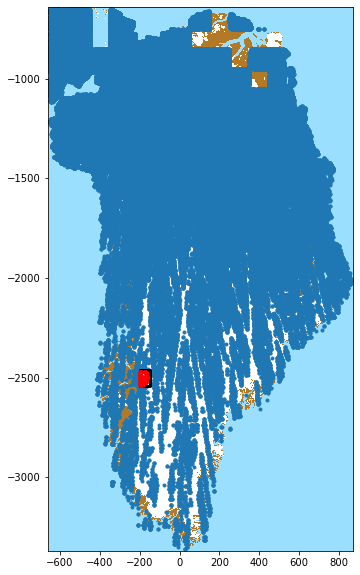

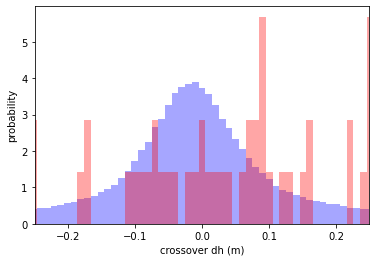

In [6]:
# Specify x/y bounds
x_min = -200000
x_max = -150000
y_min = -2540000
y_max = -2460000

# Select the crossovers
idx = np.logical_and( \
               np.logical_and( bar['x'] > x_min, bar['x'] < x_max ), \
               np.logical_and( bar['y'] > y_min, bar['y'] < y_max ) )

# Map
fig, ax = plt.subplots(1,1,figsize=(20,10))
if mask is not None:
    ax.imshow(mask, extent=extent_mask/1000., cmap=cmap_mask)
ax.plot(bar['x']/1000., bar['y']/1000., '.')
ax.plot(np.array([x_min, x_min, x_max, x_max, x_min])/1000., np.array([y_min, y_max, y_max, y_min, y_min])/1000., 'k-', linewidth=3)
ax.plot(bar['x'][idx]/1000., bar['y'][idx]/1000., 'r.')
ax.set_xlim(np.min(bar['x']-10000)/1000,np.max(bar['x']+10000)/1000)
ax.set_ylim(np.min(bar['y']-10000)/1000,np.max(bar['y']+10000)/1000)

# Histogram
bins = np.linspace(-1, 1, 200)

fig, ax = plt.subplots(1,1)
ax.hist(delta['h_li'], bins=bins, density=True, fc=(0, 0, 1, 0.35))
ax.hist(delta['h_li'][idx], bins=bins, density=True, fc=(1, 0, 0, 0.35))
ax.set_xlim(-0.25, +0.25)
ax.set_xlabel('crossover dh (m)')
_ = ax.set_ylabel('probability')


# Scatter plot of all crossovers according to delta t

Minimum crossover delta t:   0.45 days
Maximum crossover delta t:  90.37 days


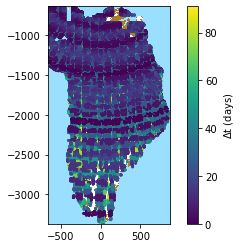

In [7]:
# Map of delta t's to see the spatial pattern of delta t's
if mask is not None:
    plt.imshow(mask, extent=extent_mask/1000., cmap=cmap_mask)
plt.scatter(bar['x']/1000, bar['y']/1000, s=4, c=delta['delta_time']/86400., vmin=0, vmax=91)
plt.colorbar(label='$\Delta$t (days)')
plt.xlim(np.min(bar['x']-10000)/1000,np.max(bar['x']+10000)/1000)
plt.ylim(np.min(bar['y']-10000)/1000,np.max(bar['y']+10000)/1000)

print('Minimum crossover delta t: {:6.2f} days'.format(np.min(delta['delta_time']/86400)))
print('Maximum crossover delta t: {:6.2f} days'.format(np.max(delta['delta_time']/86400)))


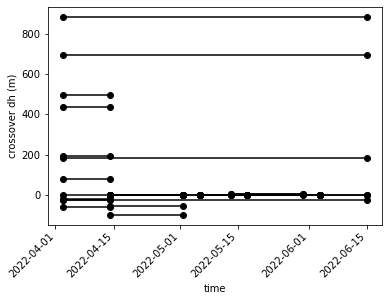

In [8]:
# Convert ATL06 times per track (stored in 'v') into UTC
# NOTE: This neglects leap seconds and the following code will convert times to UTC but will be missing 
# any leap seconds that have been issued since 01/01/2018. Nevertheless, it's fine for our purposes.
atlas_epoch = datetime.datetime(2018,1,1,0,0,0)

xover_time_utc = list()
xover_dh = list()
for i in np.where(idx)[0]:
    t = [atlas_epoch + datetime.timedelta(seconds=s) for s in v['delta_time'][i]]
    xover_time_utc.append(t)
    xover_dh.append(delta['h_li'][i])

# Plot
for i in range(len(xover_time_utc)):
    plt.plot([xover_time_utc[i][0], xover_time_utc[i][1]], [xover_dh[i], xover_dh[i]], 'ko-')

plt.xlabel('time')
plt.ylabel('crossover dh (m)')
_ = plt.xticks(rotation=45, ha='right')


# Find crossovers for each unique combination of RGTs

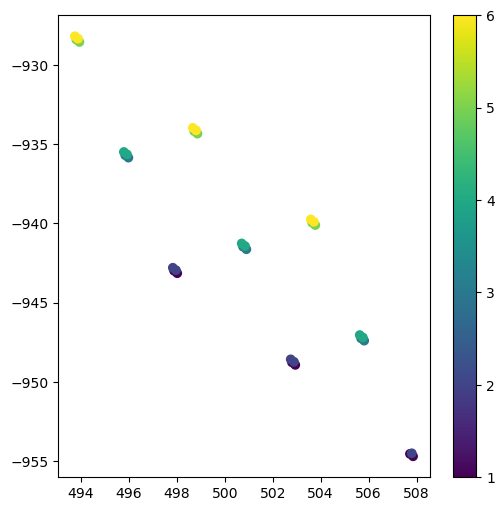

In [28]:
# Find all unique combinations of RGTs
rgts_unique = np.unique(v['rgt'], axis=0)

fig = plt.figure(figsize=(6,6))
for rgt_unique in rgts_unique:
    idx = np.where( (v['rgt'][:,0] == rgt_unique[0]) & (v['rgt'][:,1] == rgt_unique[1]) )
    
    if len(idx[0]) > 16:
        plt.scatter(bar['x'][idx]/1000., bar['y'][idx]/1000., c=v['spot'][idx,0])
        break
        
plt.colorbar()